/Users/jpena/Documents/wip/cadmium/venv/lib/python3.13/site-packages/highlight_text/htext.py:311: UserWarning: Glyph 108 (l) missing from font(s) Noto Emoji.
  self.fig.canvas.draw()
/Users/jpena/Documents/wip/cadmium/venv/lib/python3.13/site-packages/highlight_text/htext.py:311: UserWarning: Glyph 112 (p) missing from font(s) Noto Emoji.
  self.fig.canvas.draw()
/Users/jpena/Documents/wip/cadmium/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 108 (l) missing from font(s) Noto Emoji.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jpena/Documents/wip/cadmium/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 112 (p) missing from font(s) Noto Emoji.
  fig.canvas.print_figure(bytes_io, **kw)


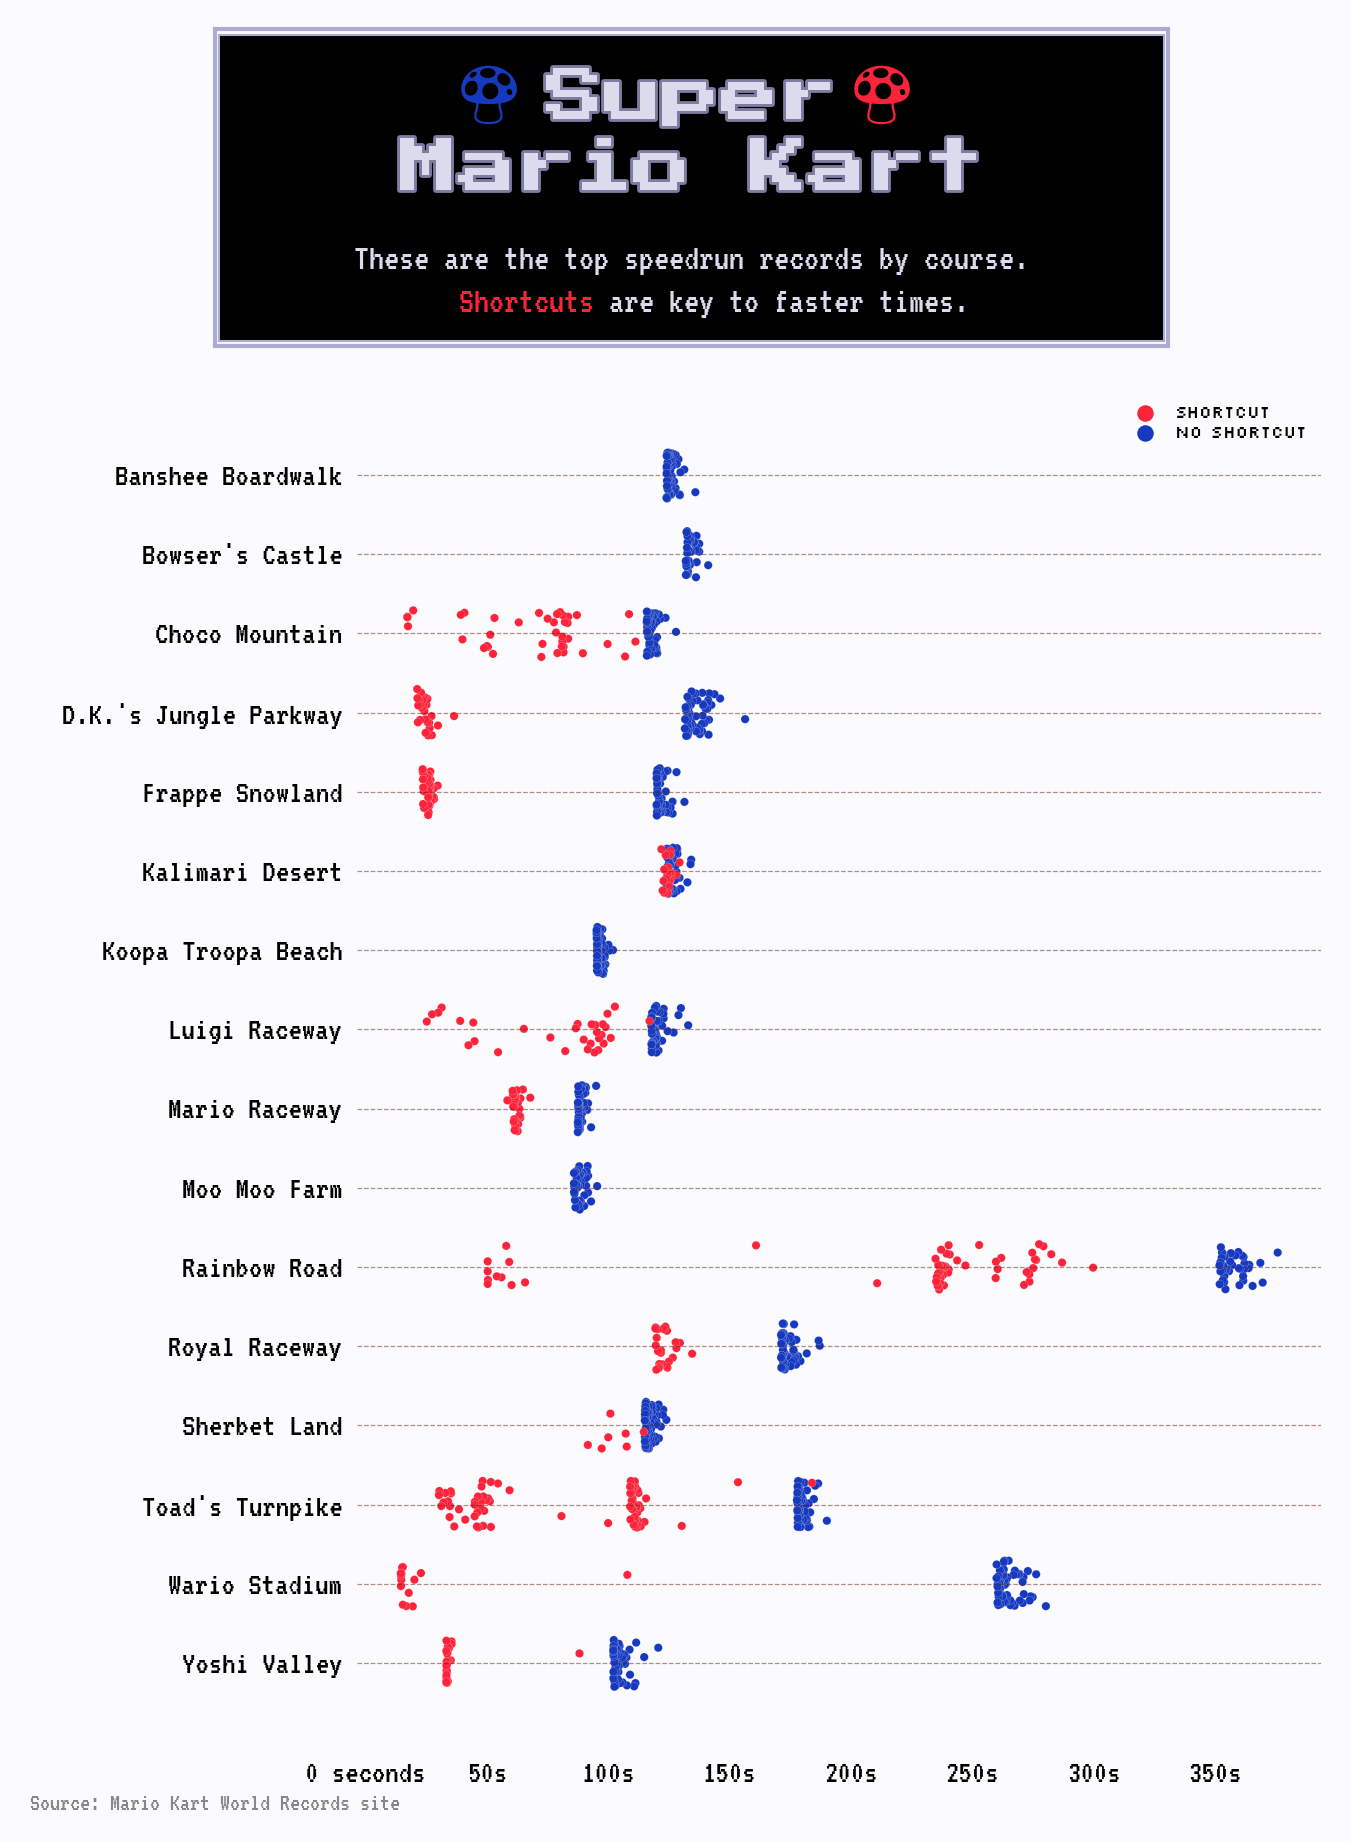

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
from pyfonts import load_google_font
from highlight_text import fig_text, ax_text
import matplotlib.patheffects as path_effects
from matplotlib.font_manager import FontProperties
import matplotlib.patches as patches


url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/mariokart/mariokart.csv"


df_mario = pl.read_csv(url)
df_mario = df_mario.with_columns(
    year = pl.col("date").cast(pl.Date).dt.year()
)

tracks = df_mario['track'].unique()
tracks=tracks.sort(descending=True).to_list()
track_to_index = {track: idx for idx, track in enumerate(tracks)}
df_mario = df_mario.with_columns(
    pl.col('track').replace(track_to_index).alias('track_index')
)


from pypalettes import load_cmap
cmap = load_cmap("FridaKahlo").colors

mario_colors = [
    '#fbfbfd',
    '#fc233a',
    '#1639bf',
    '#fbfbfd',
    '#fbfbfd',
    '#fc233a',
    '#e3ad6b',
    '#612415',
    '#fc233a'
]

def jitter(df, col, amount=0.30):
    return df[col].to_numpy().astype(float) + np.random.uniform(-amount, amount, len(df))

df_mario = df_mario.with_columns(
    track_index_jitter = jitter(df_mario, 'track_index'), 
    shortcut_flag = pl.when(pl.col('shortcut') == 'Yes')
     .then(0.5)
     .otherwise(0.0),
    shortcut_flag_color = pl.when(pl.col('shortcut') == 'Yes')
     .then(pl.lit(mario_colors[5]))
     .otherwise(pl.lit(mario_colors[2]))
)


df_mario = df_mario.filter(pl.col('type') == 'Three Lap')
df_mario = df_mario.sort('track', descending=True)


notoEmoji = load_google_font("Noto Emoji")
ft_Silkscreenont = load_google_font("Silkscreen")
ft_VT323 = load_google_font("VT323")
df_PressStart = load_google_font("Press Start 2P")


df_mario = df_mario.to_pandas()

# Plot ------------------------------------------------> #

fig, ax = plt.subplots(figsize=(4.5, 6), dpi=300, facecolor=mario_colors[0])
# Left Side

ax.set_facecolor(mario_colors[0])

ax.scatter([], [], color=mario_colors[1], label='Shortcut', s=20, edgecolors='white', linewidths=0.5)
ax.scatter([], [], color=mario_colors[2], label='No Shortcut', s=20, edgecolors='white', linewidths=0.5)

ax.scatter(df_mario.time, 
           df_mario.track_index_jitter, 
           alpha=1, 
           s=4, 
           color=df_mario.shortcut_flag_color,
           edgecolors='white', 
           linewidths=0.04
)

ax.set_yticks(np.arange(len(tracks)))
ax.tick_params(axis='y', length=0)
ax.tick_params(labelsize=6)
ax.set_yticklabels(tracks, fontproperties=ft_VT323, fontsize=8)

time_label = ['0 seconds', '50s', '100s', '150s', '200s', '250s', '300s', '350s']
ax.set_xticks(np.arange(8)*50)
ax.set_xticklabels(time_label, fontproperties=ft_VT323, fontsize=8)
ax.tick_params(axis='x', length=0)

ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

ax.grid(True, which='major', axis='y', 
        color=mario_colors[-2], 
        linestyle='--', linewidth=0.3, alpha=0.5)

# Add the legend
ft_Silkscreenont.set_size(4)
legend = ax.legend( loc='best', 
                    frameon=False, 
                    prop=ft_Silkscreenont)
legend.get_frame().set_facecolor('none')




fig.patches.extend([
    # Inner black rectangle with silver border
    patches.Rectangle(
        (.15, 0.828),
        .70,
        0.17,
        transform=fig.transFigure,
        facecolor='black',
        edgecolor='#ABABD3',  # Silver border
        linewidth=0.5,
        zorder=-1
    ),
    # Outer rectangle with shiny border, slightly larger
    patches.Rectangle(
        (.147, 0.825),        # Slightly offset to surround the first
        .706,                  # Slightly wider
        0.176,                 # Slightly taller
        transform=fig.transFigure,
        facecolor='none',     # Transparent fill
        edgecolor='#ABABD3',  # Shiny border
        linewidth=1,
        zorder=-1
    )
])


fig.suptitle(
    "Super\nMario Kart",
    fontproperties=df_PressStart,
    fontsize=14,
    color='#DBDBEE',
    path_effects=[path_effects.Stroke(linewidth=1.4, foreground='#7E7CA1'), path_effects.Normal()]
)

fig.text(0.35, 0.965, "🍄", 
         fontproperties=notoEmoji, 
         fontsize=14, 
         ha='center', 
         va='center', 
         color=mario_colors[2],
         transform=fig.transFigure, 
         zorder=10)

fig.text(0.641, 0.965, "🍄", 
         fontproperties=notoEmoji, 
         fontsize=14, 
         ha='center', 
         va='center', 
         color=mario_colors[1],
         transform=fig.transFigure, 
         zorder=10)

# ft_Silkscreenont.set_size(5)
# text = fig.text(0.40, .87, "These are the top speedrun records by course.", 
#         color=mario_colors[2], 
#         ha='center', 
#         va='top',
#         fontproperties=ft_Silkscreenont,
#         transform=fig.transFigure, 
#         zorder=10)

ft_VT323.set_size(9)
fig_text(
    s="<These are the top speedrun records by course.>\n<       Shortcuts>< are key to faster times.>",
    highlight_textprops=[
        {'color': '#DBDBEE', 'fontproperties': ft_VT323},
        {'color': mario_colors[1], 'fontproperties': ft_VT323},
        {'color': '#DBDBEE', 'fontproperties': ft_VT323}
    ],
    x=0.5, y=0.88,
    ha='center',
    va='top',
    fig=fig,
    transform=fig.transFigure, 
    zorder=999
)


fig.text(
    0.01, 0.01,  # Bottom left corner
    "Source: Mario Kart World Records site",
    color="#888888",  # Subtle gray
    fontsize=6,
    ha='left',
    va='bottom',
    fontproperties=ft_VT323,  # Or any font you prefer
    transform=fig.transFigure,
    zorder=1000
)

fig.tight_layout()
plt.subplots_adjust(top=0.80)
#fig.savefig('plots/MarioKart-Records-01.png')
plt.show()




# fig_text(
#     s="<🍄><Super Mario Kart><🍄>",
#     highlight_textprops=[
#         {'fontproperties': notoEmoji, 'fontsize': 22},  # left emoji
#         {'color': 'white', 'fontsize': 16, 'fontweight': 'bold', 'fontproperties': df_PressStart,
#          'path_effects': [path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()]},  # title
#         {'fontproperties': notoEmoji, 'fontsize': 22}   # right emoji
#     ],
#     x=0.5, y=0.93,  # Adjust y for vertical position in the banner
#     ha='center',
#     va='center',
#     fig=fig,
#     zorder=20
# )

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
from pyfonts import load_google_font
from highlight_text import fig_text, ax_text
import matplotlib.patheffects as path_effects
from matplotlib.font_manager import FontProperties
import matplotlib.patches as patches


url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/mariokart/mariokart.csv"


df_mario = pl.read_csv(url)
df_mario = df_mario.with_columns(
    year = pl.col("date").cast(pl.Date).dt.year()
)

tracks = df_mario['track'].unique()
tracks=tracks.sort(descending=True).to_list()
track_to_index = {track: idx for idx, track in enumerate(tracks)}
df_mario = df_mario.with_columns(
    pl.col('track').replace(track_to_index).alias('track_index')
)


from pypalettes import load_cmap
cmap = load_cmap("FridaKahlo").colors

mario_colors = [
    '#fbfbfd',
    '#fc233a',
    '#1639bf',
    '#fbfbfd',
    '#fbfbfd',
    '#fc233a',
    '#e3ad6b',
    '#612415',
    '#fc233a'
]

def jitter(df, col, amount=0.30):
    return df[col].to_numpy().astype(float) + np.random.uniform(-amount, amount, len(df))

df_mario = df_mario.with_columns(
    track_index_jitter = jitter(df_mario, 'track_index'), 
    shortcut_flag = pl.when(pl.col('shortcut') == 'Yes')
     .then(0.5)
     .otherwise(0.0),
    shortcut_flag_color = pl.when(pl.col('shortcut') == 'Yes')
     .then(pl.lit(mario_colors[5]))
     .otherwise(pl.lit(mario_colors[2]))
)


df_mario = df_mario.filter(pl.col('track') == "Banshee Boardwalk")
df_mario = df_mario.sort('track', descending=True)
df_mario = df_mario.to_pandas()



In [2]:
df_mario.head(100)

                track        type shortcut    player system_played  \
0   Banshee Boardwalk   Three Lap       No   Gregg G          NTSC   
1   Banshee Boardwalk   Three Lap       No   JWhalls          NTSC   
2   Banshee Boardwalk   Three Lap       No   David B          NTSC   
3   Banshee Boardwalk   Three Lap       No  Zwartjes           PAL   
4   Banshee Boardwalk   Three Lap       No   Peter E           PAL   
..                ...         ...      ...       ...           ...   
78  Banshee Boardwalk  Single Lap       No       Dan           PAL   
79  Banshee Boardwalk  Single Lap       No        MR           PAL   
80  Banshee Boardwalk  Single Lap       No       Dan           PAL   
81  Banshee Boardwalk  Single Lap       No       Dan           PAL   
82  Banshee Boardwalk  Single Lap       No        MR           PAL   

          date time_period    time  record_duration  year track_index  \
0   1997-03-10   2M 15.94S  135.94               78  1997          15   
1   1997-05-2

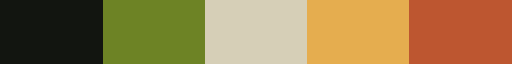

In [20]:
from pypalettes import load_cmap
cmap = load_cmap("FridaKahlo")
cmap
#fcf9eb
#cmap = load_cmap("FridaKahlo")


In [16]:
from pypalettes import load_cmap
cmap = load_cmap("FridaKahlo").colors
cmap

['#121510FF', '#6D8325FF', '#D6CFB7FF', '#E5AD4FFF', '#BD5630FF']

In [1]:
import ipywidgets as widgets
color_picker = widgets.ColorPicker(
concise=False,
description='Choose a color:',
value='blue'
)
display(color_picker)

ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

hsv_color = (0.13, 0.07, 0.99)
rgb_color = mcolors.hsv_to_rgb(hsv_color)

y = ["France", "Spain", "Canada", "UK", "Australia"]
values = [2, 5, 3, 4, 5]

fig, ax = plt.subplots()
ax.barh(
  y,
  values,
  color=rgb_color
)
plt.show()

          

In [10]:
import matplotlib.colors as mcolors

hex_color = "#FFFFA8"
rgb = mcolors.hex2color(hex_color)         # Converts hex to RGB tuple (0-1 range)
hsv = mcolors.rgb_to_hsv(rgb)              # Converts RGB to HSV

print(hsv)  # (hue, saturation, value)

[0.16666667 0.34117647 1.        ]


In [ ]:
0.16666667 *360 
# this is pure yellow. Should not be used. 

60.00000119999999

In [3]:
import matplotlib.colors as mcolors
#fcf9eb
hex_color = "#fcf9eb"
rgb = mcolors.hex2color(hex_color)         # Converts hex to RGB tuple (0-1 range)
hsv = mcolors.rgb_to_hsv(rgb)              # Converts RGB to HSV

print(hsv)  # (hue, saturation, value)

[0.1372549  0.06746032 0.98823529]


In [ ]:
0.1372549 *360 
#cmap[2] in FridaKahlo
# fcf9eb This is 49. 11 away from 60 (pure yellow)

49.411764000000005

In [19]:
#D6CFB7FF
import matplotlib.colors as mcolors
hex_color = "#D6CFB7FF"
rgb = mcolors.hex2color(hex_color)         # Converts hex to RGB tuple (0-1 range)
hsv = mcolors.rgb_to_hsv(rgb)              # Converts RGB to HSV

print(hsv)  # (hue, saturation, value)


[0.12903226 0.14485981 0.83921569]


In [23]:
0.12903226 * 360

46.4516136

In [ ]:
from pypalettes import load_cmap
cmap = load_cmap("land")


TypeError: 'ListedColormap' object is not subscriptable

In [ ]:
from pypalettes import load_cmap
import matplotlib.colors as mcolors

# Load the "land" color palette
cmap = load_cmap("land")
cmap


original_colors = cmap.colors
for i, color in enumerate(original_colors):
    rgb = mcolors.hex2color(color)
    hsv = mcolors.rgb_to_hsv(rgb)
    print(f'Color {i+1} - {color}: Hue={hsv[0]*360:.1f}° Saturation={hsv[1]:.3f} Brightness={hsv[2]:.3f}')

print("\n" + "="*60)
print("Modified colors (1% saturation, 99% brightness):")

modified_colors = []
for i, color in enumerate(original_colors):
    rgb = mcolors.hex2color(color)
    hsv = mcolors.rgb_to_hsv(rgb)
    
    # Modify HSV: keep hue, set saturation to 0.01 (1%), brightness to 0.99 (99%)
    modified_hsv = (hsv[0], 0.01, 0.99)
    
    # Convert back to RGB and then to hex
    modified_rgb = mcolors.hsv_to_rgb(modified_hsv)
    modified_hex = mcolors.rgb2hex(modified_rgb)
    
    modified_colors.append(modified_hex)
    print(f'Color {i+1} - Original: {color} → Modified: {modified_hex}')

print(f"\nModified color list: {modified_colors}")

Original 'land' palette:

Original colors:
Color 1 - #5566AAFF: Hue=228.0° Saturation=0.500 Brightness=0.667
Color 2 - #117733FF: Hue=140.0° Saturation=0.857 Brightness=0.467
Color 3 - #44AA66FF: Hue=140.0° Saturation=0.600 Brightness=0.667
Color 4 - #55AA22FF: Hue=97.5° Saturation=0.800 Brightness=0.667
Color 5 - #668822FF: Hue=80.0° Saturation=0.750 Brightness=0.533
Color 6 - #99BB55FF: Hue=80.0° Saturation=0.545 Brightness=0.733
Color 7 - #558877FF: Hue=160.0° Saturation=0.375 Brightness=0.533
Color 8 - #88BBAAFF: Hue=160.0° Saturation=0.273 Brightness=0.733
Color 9 - #AADDCCFF: Hue=160.0° Saturation=0.231 Brightness=0.867
Color 10 - #44AA88FF: Hue=160.0° Saturation=0.600 Brightness=0.667
Color 11 - #DDCC66FF: Hue=51.4° Saturation=0.538 Brightness=0.867
Color 12 - #FFDD44FF: Hue=49.1° Saturation=0.733 Brightness=1.000
Color 13 - #FFEE88FF: Hue=51.4° Saturation=0.467 Brightness=1.000
Color 14 - #BB0011FF: Hue=354.5° Saturation=1.000 Brightness=0.733

Modified colors (1% saturation, 9

In [44]:
from pypalettes import load_cmap
cmap = load_cmap("FridaKahlo").colors

for color in cmap:
    rgb = mcolors.hex2color(color)         # Converts hex to RGB tuple (0-1 range)
    hsv = mcolors.rgb_to_hsv(rgb)   
    print(f'{color}: {hsv[0]*360} {hsv[1:]}')

#121510FF: 96.0 [0.23809524 0.08235294]
#6D8325FF: 74.04255319148935 [0.71755725 0.51372549]
#D6CFB7FF: 46.451612903225794 [0.14485981 0.83921569]
#E5AD4FFF: 37.6 [0.65502183 0.89803922]
#BD5630FF: 16.17021276595745 [0.74603175 0.74117647]


In [ ]:
from pypalettes import load_cmap
cmap = load_cmap("FridaKahlo").colors
cmap

'#fcfbf7'

['#121510FF', '#6D8325FF', '#D6CFB7FF', '#E5AD4FFF', '#BD5630FF']

In [ ]:
mario_colors = [
    '#fbfbfd',
    '#fc233a',
    '#1639bf',
    '#fbfbfd',
    '#fbfbfd',
    '#1f1010',
    '#e3ad6b',
    '#612415',
    '#fc233a'

]

for color in mario_colors:
    rgb = mcolors.hex2color(color)         # Converts hex to RGB tuple (0-1 range)
    hsv = mcolors.rgb_to_hsv(rgb)   
    print(f'{color}: hue: {hsv[0]*360:.1f} saturation:{hsv[1]:.3f} brightness: {hsv[2]:.3f}')

print('-'*60)


    

#fbfbfd: hue: 240.0 saturation:0.008 brightness: 0.992
#fc233a: hue: 353.6 saturation:0.861 brightness: 0.988
#1639bf: hue: 227.6 saturation:0.885 brightness: 0.749
#fbfbfd: hue: 240.0 saturation:0.008 brightness: 0.992
#fbfbfd: hue: 240.0 saturation:0.008 brightness: 0.992
#1f1010: hue: 0.0 saturation:0.484 brightness: 0.122
#e3ad6b: hue: 33.0 saturation:0.529 brightness: 0.890
#612415: hue: 11.8 saturation:0.784 brightness: 0.380
#fc233a: hue: 353.6 saturation:0.861 brightness: 0.988
------------------------------------------------------------


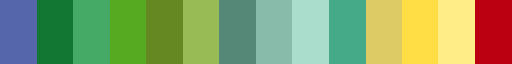

In [18]:
from pypalettes import load_cmap
cmap = load_cmap("land")
cmap

In [35]:
from pypalettes import load_cmap
import matplotlib.colors as mcolors

# Load the "land" color palette
cmap = load_cmap("land")
cmap


original_colors = cmap.colors
for i, color in enumerate(original_colors):
    rgb = mcolors.hex2color(color)
    hsv = mcolors.rgb_to_hsv(rgb)
    print(f'Color {i+1} - {color}: Hue={hsv[0]*360:.1f}° Saturation={hsv[1]:.3f} Brightness={hsv[2]:.3f}')

print("\n" + "="*60)
print("Modified colors (1% saturation, 99% brightness):")

modified_colors = []
for i, color in enumerate(original_colors):
    rgb = mcolors.hex2color(color)
    hsv = mcolors.rgb_to_hsv(rgb)
    
    # Modify HSV: keep hue, set saturation to 0.01 (1%), brightness to 0.99 (99%)
    modified_hsv = (hsv[0], 1, 0.99)
    
    # Convert back to RGB and then to hex
    modified_rgb = mcolors.hsv_to_rgb(modified_hsv)
    modified_hex = mcolors.rgb2hex(modified_rgb)
    
    modified_colors.append(modified_hex)
    print(f'Color {i+1} - Original: {color} → Modified: {modified_hex}')

print(f"\nModified color list: {modified_colors}")

Color 1 - #5566AAFF: Hue=228.0° Saturation=0.500 Brightness=0.667
Color 2 - #117733FF: Hue=140.0° Saturation=0.857 Brightness=0.467
Color 3 - #44AA66FF: Hue=140.0° Saturation=0.600 Brightness=0.667
Color 4 - #55AA22FF: Hue=97.5° Saturation=0.800 Brightness=0.667
Color 5 - #668822FF: Hue=80.0° Saturation=0.750 Brightness=0.533
Color 6 - #99BB55FF: Hue=80.0° Saturation=0.545 Brightness=0.733
Color 7 - #558877FF: Hue=160.0° Saturation=0.375 Brightness=0.533
Color 8 - #88BBAAFF: Hue=160.0° Saturation=0.273 Brightness=0.733
Color 9 - #AADDCCFF: Hue=160.0° Saturation=0.231 Brightness=0.867
Color 10 - #44AA88FF: Hue=160.0° Saturation=0.600 Brightness=0.667
Color 11 - #DDCC66FF: Hue=51.4° Saturation=0.538 Brightness=0.867
Color 12 - #FFDD44FF: Hue=49.1° Saturation=0.733 Brightness=1.000
Color 13 - #FFEE88FF: Hue=51.4° Saturation=0.467 Brightness=1.000
Color 14 - #BB0011FF: Hue=354.5° Saturation=1.000 Brightness=0.733

Modified colors (1% saturation, 99% brightness):
Color 1 - Original: #5566AA

#5566AAFF: hue: 228.0 saturation:0.500 brightness: 0.667
#117733FF: hue: 140.0 saturation:0.857 brightness: 0.467
#44AA66FF: hue: 140.0 saturation:0.600 brightness: 0.667
#55AA22FF: hue: 97.5 saturation:0.800 brightness: 0.667
#668822FF: hue: 80.0 saturation:0.750 brightness: 0.533
#99BB55FF: hue: 80.0 saturation:0.545 brightness: 0.733
#558877FF: hue: 160.0 saturation:0.375 brightness: 0.533
#88BBAAFF: hue: 160.0 saturation:0.273 brightness: 0.733
#AADDCCFF: hue: 160.0 saturation:0.231 brightness: 0.867
#44AA88FF: hue: 160.0 saturation:0.600 brightness: 0.667
#DDCC66FF: hue: 51.4 saturation:0.538 brightness: 0.867
#FFDD44FF: hue: 49.1 saturation:0.733 brightness: 1.000
#FFEE88FF: hue: 51.4 saturation:0.467 brightness: 1.000
#BB0011FF: hue: 354.5 saturation:1.000 brightness: 0.733
228.0
140.0
140.0
97.5
80.0
80.0
160.0
160.0
160.0
160.0
51.4
49.1
51.4
354.5
#e3e8fc: hue: 228.0 saturation:0.099 brightness: 0.988
#e3fcec: hue: 141.6 saturation:0.099 brightness: 0.988
#e3fcec: hue: 141.6 

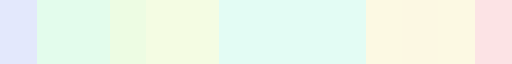

In [48]:
from pypalettes import load_cmap
import matplotlib.colors as mcolors

cmap = load_cmap("land")
cmap
for color in cmap.colors:
    rgb = mcolors.hex2color(color)         # Converts hex to RGB tuple (0-1 range)
    hsv = mcolors.rgb_to_hsv(rgb)   
    print(f'{color}: hue: {hsv[0]*360:.1f} saturation:{hsv[1]:.3f} brightness: {hsv[2]:.3f}')

print("="*60)

modified_cmap = []
for color in cmap.colors:
    rgb = mcolors.hex2color(color)
    hsv = mcolors.rgb_to_hsv(rgb)
    modified_hsv = (hsv[0], 0.10, 0.99)
    modified_rgb = mcolors.hsv_to_rgb(modified_hsv)
    modified_hex = mcolors.rgb2hex(modified_rgb)
    modified_cmap.append(modified_hex)
    print(f'{hsv[0]*360:.1f}')

for color in modified_cmap:
    rgb = mcolors.hex2color(color)         # Converts hex to RGB tuple (0-1 range)
    hsv = mcolors.rgb_to_hsv(rgb)   
    print(f'{color}: hue: {hsv[0]*360:.1f} saturation:{hsv[1]:.3f} brightness: {hsv[2]:.3f}')

x = mcolors.ListedColormap(modified_cmap)

x


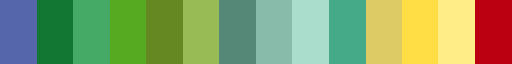

In [40]:
from pypalettes import load_cmap
import matplotlib.colors as mcolors

cmap = load_cmap("land")
cmap
